In [47]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt


In [118]:
data = nc.Dataset("hsdata/rho-theta_470days-10dayint_rll.nc")

In [11]:
lon = data.variables['lon'][:].data
lat = data.variables['lat'][:].data
z = data.variables['z'][:].data
t = data.variables['time'][:].data / 3600 / 24
rho = data.variables['rho'][:].data
theta = data.variables['theta'][:].data
u = data.variables['u'][:].data
v = data.variables['v'][:].data


# time ave (Day 200 ~ 400) zonal mean plots for u, v, theta

In [52]:
tidx = ( (t - 200) * (t-400) ) <0.0
u_zonal_ave = u[tidx, :,:,:].mean(axis=3).mean(axis=0)
v_zonal_ave = v[tidx, :,:,:].mean(axis=3).mean(axis=0)
theta_zonal_ave = theta[tidx, :,:,:].mean(axis=3).mean(axis=0)

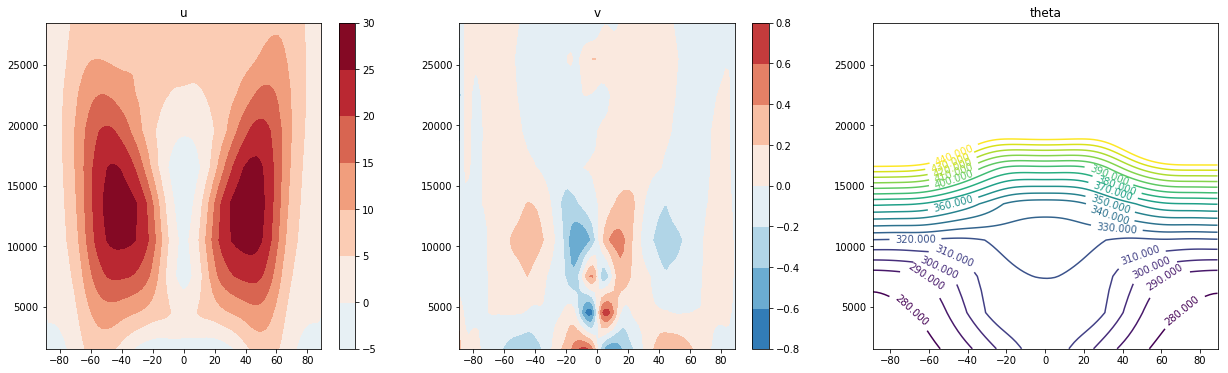

In [82]:
_fig, _ax = plt.subplots(1,3, figsize=(21, 6))

uct = _ax[0].contourf(lat, z, u_zonal_ave, vmin = -30, vmax = 30, cmap='RdBu_r')
_fig.colorbar(uct, ax=_ax[0])
vct = _ax[1].contourf(lat, z, v_zonal_ave, vmin = -1, vmax = 1, cmap='RdBu_r')
_fig.colorbar(vct, ax=_ax[1])
thetact = _ax[2].contour(lat, z, theta_zonal_ave, levels = np.arange(270, 450, 10))
_ax[2].clabel(thetact)

_ax[0].set_title("u")
_ax[1].set_title("v")
_ax[2].set_title("theta")

plt.show()

# zonal mean plots for u, v, theta for Day 470

In [83]:
tidx = (t == 470)
u_zonal_ave = u[tidx, :,:,:].mean(axis=3).mean(axis=0)
v_zonal_ave = v[tidx, :,:,:].mean(axis=3).mean(axis=0)
theta_zonal_ave = theta[tidx, :,:,:].mean(axis=3).mean(axis=0)

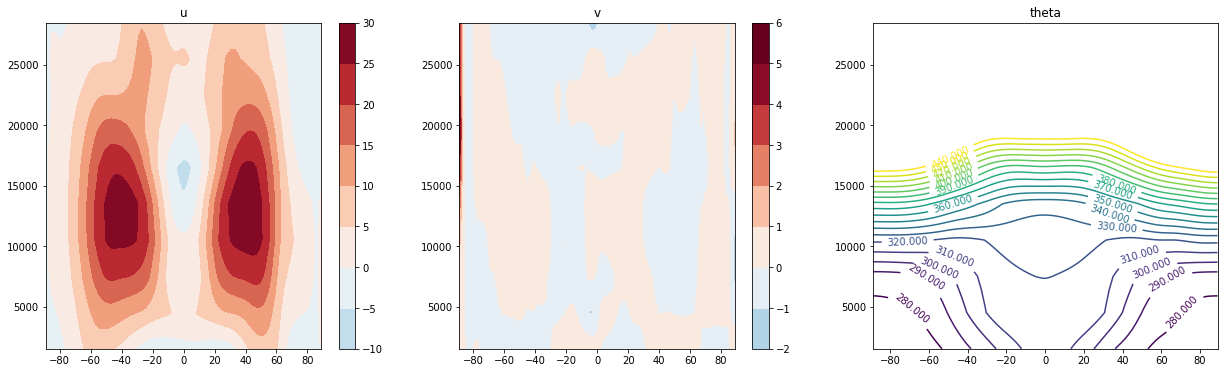

In [86]:
_fig, _ax = plt.subplots(1,3, figsize=(21, 6))

uct = _ax[0].contourf(lat, z, u_zonal_ave, vmin = -30, vmax = 30, cmap='RdBu_r')
_fig.colorbar(uct, ax=_ax[0])
vct = _ax[1].contourf(lat, z, v_zonal_ave, vmin = -5, vmax = 5, cmap='RdBu_r')
_fig.colorbar(vct, ax=_ax[1])
thetact = _ax[2].contour(lat, z, theta_zonal_ave, levels = np.arange(270, 450, 10))
_ax[2].clabel(thetact)

_ax[0].set_title("u")
_ax[1].set_title("v")
_ax[2].set_title("theta")

plt.show()

# maps of u, v on Day 470

In [101]:
tidx = (t == 470)
u_map = u[tidx, :,:,:]
v_map = v[tidx, :,:,:]


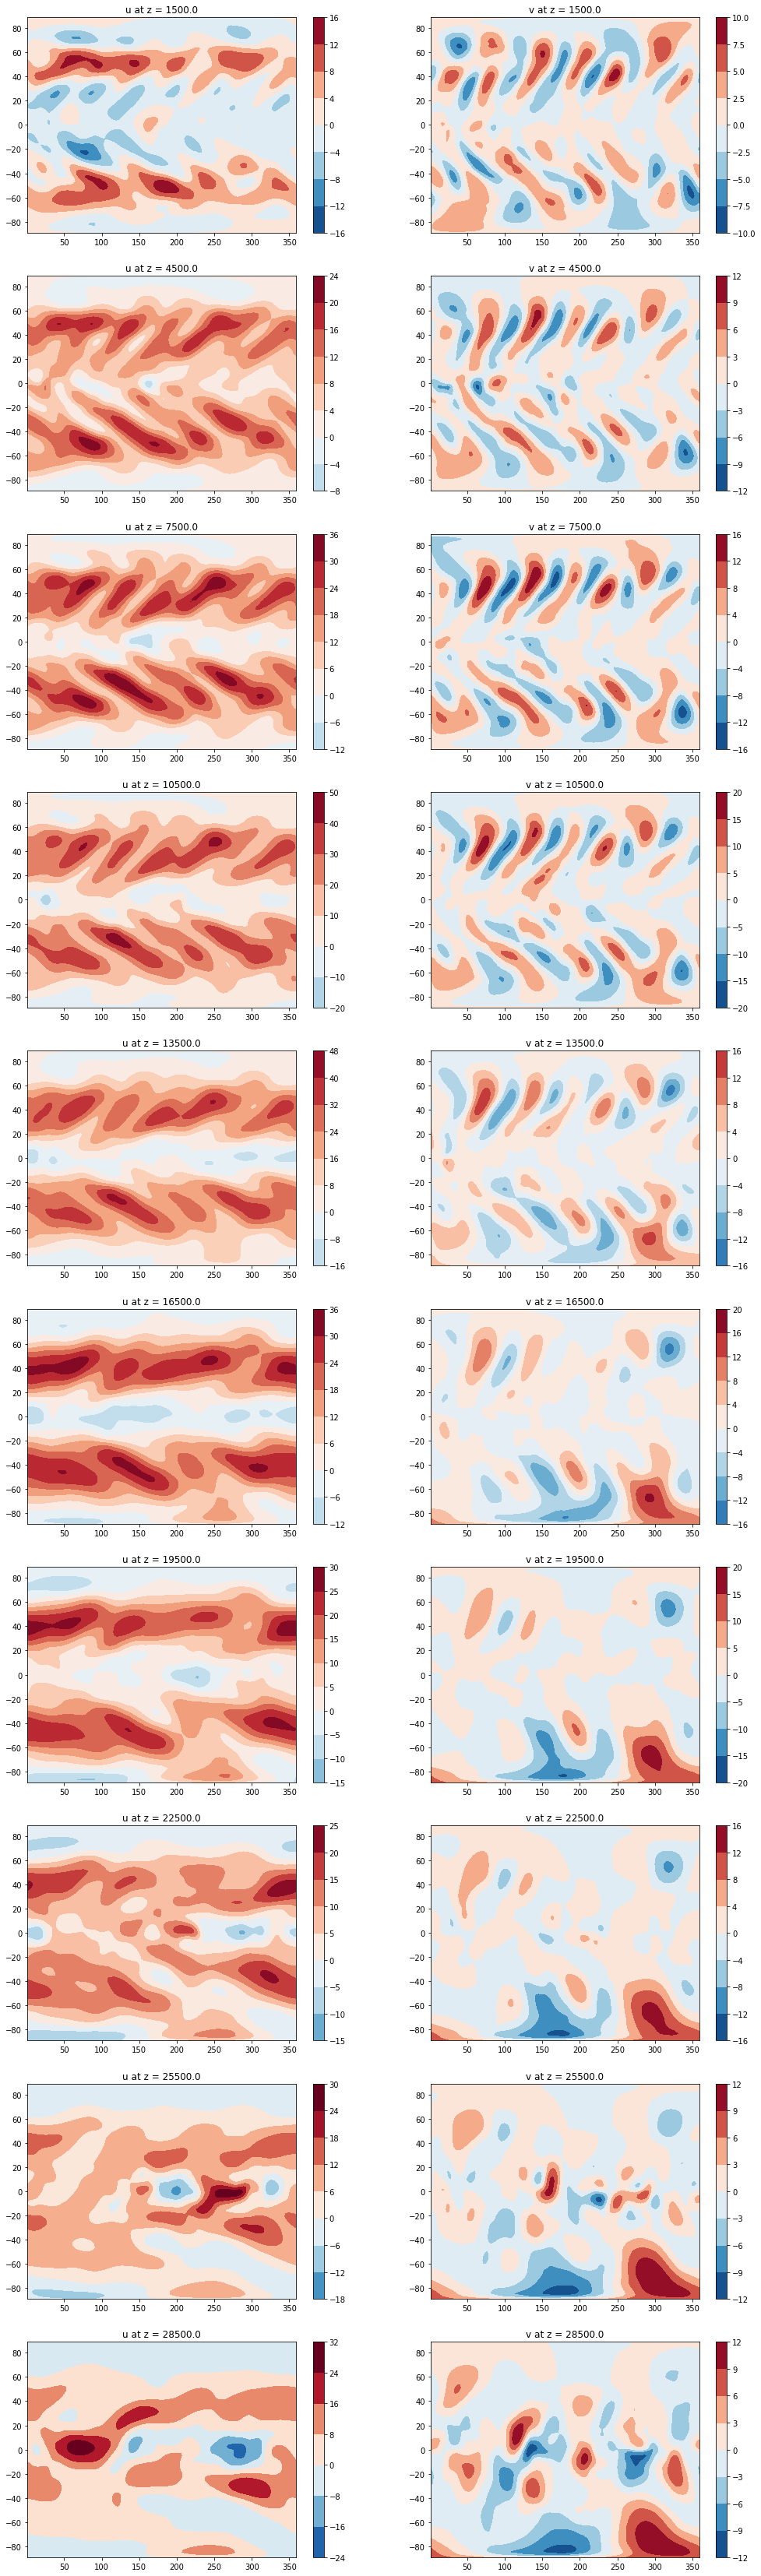

In [117]:
_fig, _ax = plt.subplots(10,2, figsize=(17, 60))
ulim = [16, 24, 36, 50, 50, 36, 30, 25, 25, 25]
vlim = [10, 12, 16, 20, 20, 20, 20, 16, 12, 12]

for ilev in np.arange(10):
    uct = _ax[ilev, 0].contourf(lon, lat, u_map[:,ilev,:,:].squeeze(), vmin = -ulim[ilev], vmax = ulim[ilev], cmap = 'RdBu_r')
    _fig.colorbar(uct, ax = _ax[ilev,0])
    
    vct = _ax[ilev, 1].contourf(lon, lat, v_map[:,ilev,:,:].squeeze(), vmin = -vlim[ilev], vmax = vlim[ilev], cmap = 'RdBu_r')
    _fig.colorbar(vct, ax = _ax[ilev,1])
    
    _ax[ilev, 0].set_title('u at z = ' + str(z[ilev]))
    _ax[ilev, 1].set_title('v at z = ' + str(z[ilev]))

plt.show()

In [109]:
u_map[:,ilev,:,:].squeeze().shape

(90, 180)